In [4]:
#Import necessary modules
import pandas as pd
import numpy as np

#import module to allow for making graphs 
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#open the csv file
df = pd.read_csv("USRenalDataSet.csv")

**DATA EXPLORATION**

In [7]:
#start exploring the data
df.head(10)

,ID,tdeath,death,age,female,racegrp,smokegrp,hist.cvd,diabetes,esrdtime,undnour,bmi,albumin,cholest,trigly
0,472,427,0.0,69.0,1.0,1,1,1,1,2.841096,0,28.19476764,3.6,215,162
1,713,427,0.0,41.0,0.0,1,2,0,0,2.213699,0,20.98765432,4.1,102,195
2,806,427,0.0,76.0,1.0,2,2,1,1,0.904110,1,22.82171732,3.7,196,118
3,1172,427,0.0,71.0,0.0,1,1,1,0,14.926027,,18.9925565,3.6,125,
4,1181,169,1.0,62.0,0.0,1,3,0,1,2.865753,0,24.62443311,4.0,246,201
5,1288,427,0.0,62.0,0.0,2,2,1,0,1.575342,0,30.66394856,4.4,162,277
6,1400,427,0.0,57.0,0.0,3,1,,1,6.810959,0,21.19338239,3.9,103,73
7,1410,427,0.0,73.0,1.0,1,1,1,0,14.597260,1,16.23000282,3.0,145,116
8,1524,419,1.0,70.0,0.0,1,NaN,0,0,4.419178,0,26.01532242,3.8,234,168
9,1655,427,0.0,69.0,1.0,2,1,1,0,2.846575,,20.81165453,2.9,272,202


In [9]:
df.shape

(1979, 15)

In [11]:
#look at statistics of dataframe
df.describe()

,ID,tdeath,death,age,female,esrdtime,albumin
count,1979.000000,1979.000000,1978.000000,1965.000000,1972.000000,1979.000000,1979.000000
mean,153900.438605,366.803941,0.247219,60.342494,0.488337,2.978971,3.722132
std,80086.304508,123.190359,0.431504,15.331246,0.499991,3.519853,0.500591
min,472.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.600000
25%,84506.500000,427.000000,0.000000,50.000000,0.000000,0.564384,3.500000
50%,169718.000000,427.000000,0.000000,63.000000,0.000000,1.797260,3.800000
75%,226105.500000,427.000000,0.000000,72.000000,1.000000,4.058904,4.000000
max,332520.000000,427.000000,1.000000,93.000000,1.000000,20.164384,7.000000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'tdeath'}>,
        <AxesSubplot:title={'center':'death'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'female'}>,
        <AxesSubplot:title={'center':'esrdtime'}>],
       [<AxesSubplot:title={'center':'albumin'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

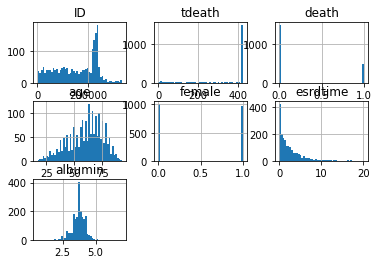

In [12]:
#visualize the data
df.hist(bins=50)

**IDENTIFYING MISSING DATA**

In [13]:
#identify the amount of missing data in this dataframe
df.isnull().head()

,ID,tdeath,death,age,female,racegrp,smokegrp,hist.cvd,diabetes,esrdtime,undnour,bmi,albumin,cholest,trigly
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#see how many missing data points for each column
df.isnull().sum()

ID           0
tdeath       0
death        1
age         14
female       7
racegrp      2
smokegrp     1
hist.cvd     0
diabetes     1
esrdtime     0
undnour      0
bmi          0
albumin      0
cholest      0
trigly       0
dtype: int64

In [18]:
#imputation: fill in empty cells in the following columns:
#death, age, female, racegrp, smokegrp, diabetes
#start by looking at the data types
df["death"].dtype

dtype('float64')

In [19]:
df["age"].dtype

dtype('float64')

In [20]:
df["female"].dtype

dtype('float64')

In [21]:
df["racegrp"].dtype

dtype('O')

In [22]:
df["smokegrp"].dtype

dtype('O')

In [23]:
df["diabetes"].dtype

dtype('O')

In [25]:
#imputation for numerical data --> use column mean as replacement 
df["age"].fillna(df["age"].mean(), inplace = True)

In [27]:
df["age"].isnull().sum()

0

In [55]:
#female and death are recorded as numeric, but they are assigned/dummy variables with 0=alive, 1 = dead and 0=male, 1= female, respectively
#this technically is categorical, so we will replace the missing values with "missing"
df["female"].fillna("missing", inplace = True)
df["death"].fillna("missing", inplace = True)

In [29]:
#check if replacement worked
df["female"].isnull().sum()

0

In [56]:
df["death"].isnull().sum()

0

In [31]:
#replace missing values for the last three categorical variables with "missing"
df["racegrp"].fillna("missing", inplace = True)

In [32]:
df["smokegrp"].fillna("missing", inplace = True)

In [33]:
df["diabetes"].fillna("missing", inplace = True)

In [ ]:
#check if replacements worked

In [34]:
df["racegrp"].isnull().sum()

0

In [35]:
df["smokegrp"].isnull().sum()

0

In [36]:
df["diabetes"].isnull().sum()

0

**ADDRESSING RELATIONSHIPS: CORRELATIONS**

In [58]:
#to determine strength of correlation, we need to look at r values
df.corr()

,ID,tdeath,death,age,esrdtime,albumin
ID,1.000000,-0.036978,0.035400,0.117225,-0.427575,-0.167339
tdeath,-0.036978,1.000000,-0.850152,-0.262318,0.072809,0.218361
death,0.035400,-0.850152,1.000000,0.276609,-0.084142,-0.190219
age,0.117225,-0.262318,0.276609,1.000000,-0.230898,-0.128189
esrdtime,-0.427575,0.072809,-0.084142,-0.230898,1.000000,0.153749
albumin,-0.167339,0.218361,-0.190219,-0.128189,0.153749,1.000000


In [59]:
#identify high correlations:
#tdeath and death
#do these two variables show collinearity? how meaningful are they really? 
#import function to create matrix from dataframe
from pandas.plotting import scatter_matrix

<AxesSubplot:title={'center':'Relationship between Death and tdeath'}, xlabel='tdeath', ylabel='death'>

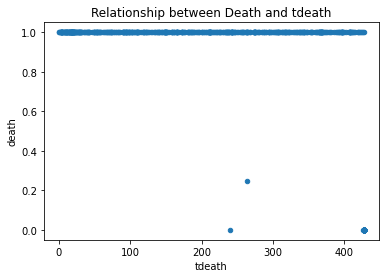

In [63]:
#visually look at correlation via scatter plot
df.plot.scatter(x="tdeath", y = "death", title = "Relationship between Death and tdeath")

In [ ]:
#clearly death and tdeath are almost the same, as tdeath is just sequential position in death reported
#due to this, we could probably remove tdeath from our data and just keep death, since they are showing the same meaning


**MEANINGFUL QUESTION**

<AxesSubplot:title={'center':'Relationship between albumin levels and time until death from ESRD'}, xlabel='albumin', ylabel='esrdtime'>

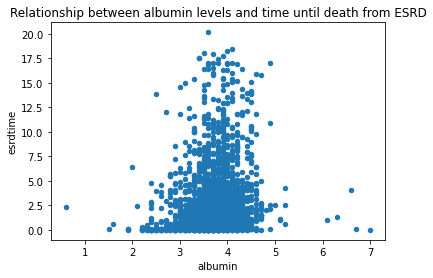

In [68]:
#I'm curious about albumin levels in relation to years until death
#I'll start by looking at their scatter plot
df.plot.scatter(x="albumin", y = "esrdtime", title = "Relationship between albumin levels and time until death from ESRD")

In [74]:
#look at r value
# r is .15, which is pretty low, which is why the plot shows they are not strongly correlated
df[["albumin", "esrdtime"]].corr()

,albumin,esrdtime
albumin,1.000000,0.153749
esrdtime,0.153749,1.000000


**END**